In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [85]:
model_flights = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')

##### Количество рейсов, выполняемых разными моделями самолетов

In [86]:
#Посмотрим на данные
model_flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [87]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


С типами данных все в порядке. 

In [88]:
model_flights.describe().T

,count,mean,std,min,25%,50%,75%,max
flights_amount,8.0,2035.625,1965.203947,300.0,605.25,795.0,4250.25,4557.0


Датасет скошен вправо.

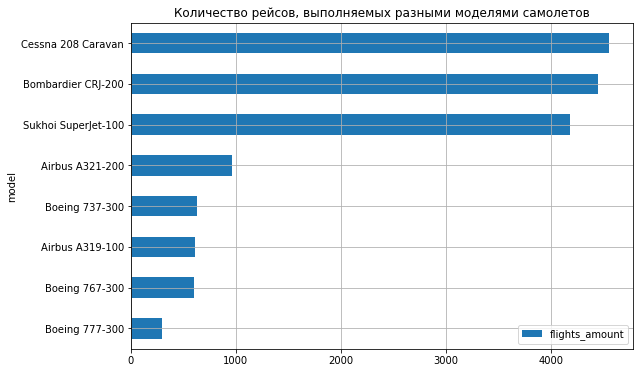

In [89]:
model_flights.sort_values(by='flights_amount').plot(kind='barh', x='model', 
                                                    title='Количество рейсов, выполняемых разными моделями самолетов', grid=True, 
                                                    figsize=(9, 6))

Eсть три наиболее популярные модели самолетов, каждый из которых делает количество рейсов, приблизительно равное суммарному количеству рейсов оставшихся четырех моделей

##### Среднее количество рейсов в день, прибывающих в сентябре 2018 года, по городам

In [90]:
#Посмотрим на вторую таблицу
city_flights.sort_values(by='average_flights', ascending=False).head()

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581


In [91]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Пропуски отсутствуют, тип данных столбца average_flights надо привести к целочисленному значению

In [92]:
# Тип данных average_flight приведем к целочисленному значению
city_flights['average_flights'] = city_flights['average_flights'].astype('int')

In [93]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [94]:
#Посмотрим на описательные статистикии датасета.
city_flights.describe().T

,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.217822,13.06109,1.0,2.0,3.0,5.0,129.0


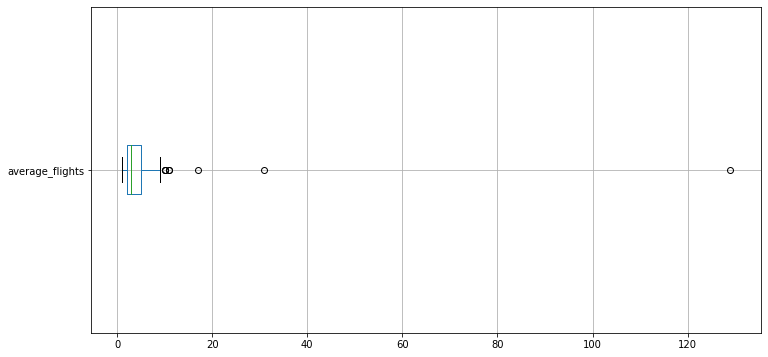

In [99]:
city_flights.boxplot(vert=False, figsize=(12, 6)) 

В 75% российских городов среднесуточное количество рейсов в сентябре 2018 года было от 5 и менее рейсов в день. Из общей картины существенно выбивается Москва, где среднесуточное количество рейсов 129. В среднем по стране среднесуточное количество перевозок в сентябре 2018 года составляло 5. А медианное значение - 3 авиарейса. Скошенность датасета вправо обусловлена влиянием городов-миллионников: Москвы и Санкт-Петербурга.  

##### Топ-10 городов по количеству рейсов

In [96]:
top_10_cities = city_flights.sort_values(by='average_flights').tail(10)

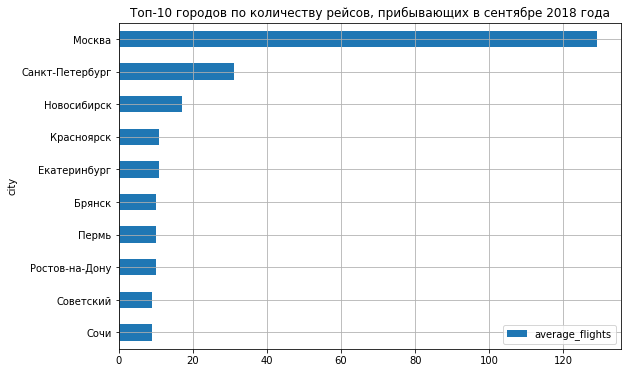

In [97]:
top_10_cities.plot(kind='barh', 
                   title='Топ-10 городов по количеству рейсов, прибывающих в сентябре 2018 года', 
                   x='city', figsize=(9, 6), grid=True)

Центр всех авиаперевозок - Москва. В пятерку лидеров входят также города-миллионники: Санкт-Петербург, Новосибирск, КРасноярск, Екатеринбург.

### Выводы

1. Eсть три наиболее популярные модели самолетов, каждый из которых делает количество рейсов, приблизительно равное суммарному количеству рейсов оставшихся четырех моделей. Это Bombardier CRJ-200,Cessna 208 Caravan	4557, Sukhoi SuperJet-100. 
2. 75% российских городов среднесуточное количество рейсов в сентябре 2018 года было от 5 и менее рейсов в день. В среднем по стране среднесуточное количество перевозок в сентябре 2018 года составляло 5. А медианное значение - 3 авиарейса. Скошенность датасета вправо обусловлена влиянием городов-миллионников: Москвы и Санкт-Петербурга. 
3. Центр всех авиаперевозок - Москва, где среднесуточное количество рейсов 129. В пятерку лидеров входят также города-миллионники: Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург.